## Problem Statement:

The dataset, Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:

Age: The age of the customer.
Job: The occupation of the customer.
Marital Status: The marital status of the customer.
Education: The education level of the customer.
Default: Whether or not the customer has credit in default.
Balance: The balance of the customer's account.
Housing Loan: Whether or not the customer has a housing loan.
Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
Day: The day of the month when the last contact with the customers was made.
Duration: The duration (in seconds) of the last contact with customers during a campaign.
Campaign Contacts Count: Number of contacts performed during this campaign for each customer
-pdays : number days passed since previously contacted form previous camapign
-poutcome : outcome from previous marketing campaign
The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these various features. By analyzing historical data on successful and unsuccessful subscription outcomes, patterns can be identified which help predict future subscription behavior.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None) # For viewing all the columns
pd.set_option("display.max_rows", None) # for viewing all the rows
import numpy as np
import seaborn as sns
sns.color_palette("hls", 8)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("/kaggle/input/bank-term-deposit-predictions/train.csv")

In [3]:
print(f"Shape of the data: {train_df.shape}")

Shape of the data: (45211, 17)


## Exploratory data analysis

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
## Checking for duplicate records

train_df.duplicated().sum()

0

In [7]:
## Checking for missing values

train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## There is no missing values, as well duplicate records

<Axes: xlabel='poutcome', ylabel='count'>

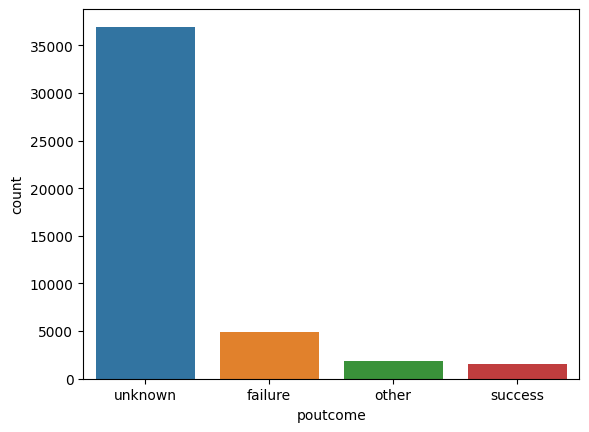

In [8]:
sns.countplot(data=train_df, x='poutcome')

<Axes: xlabel='contact', ylabel='count'>

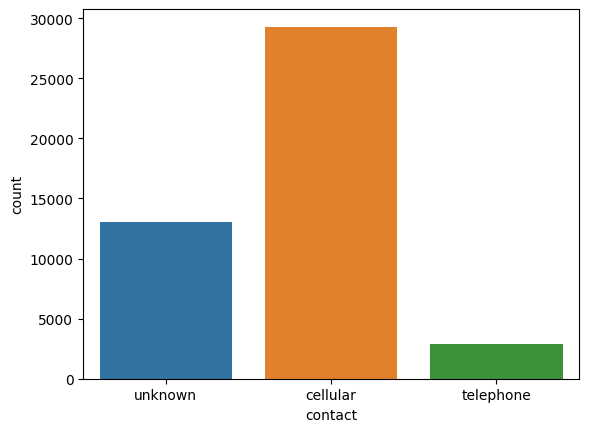

In [9]:
sns.countplot(data=train_df, x='contact')

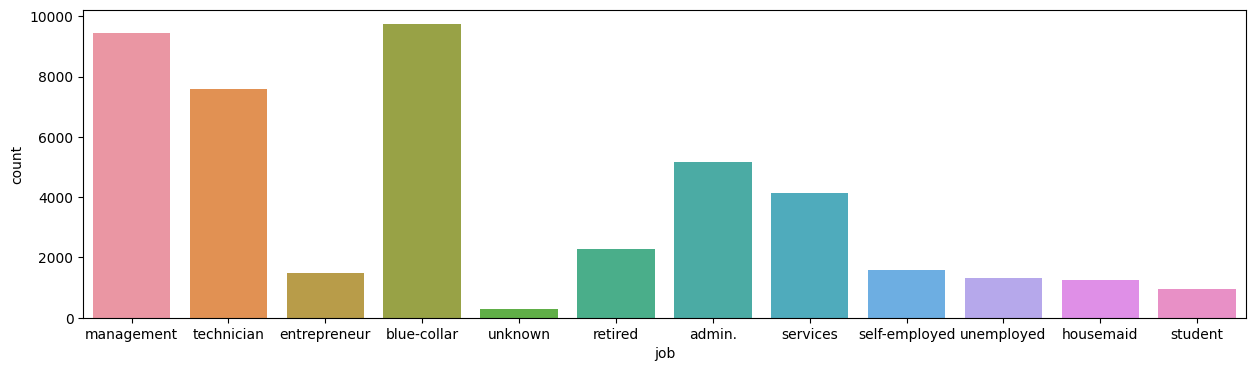

In [10]:
plt.figure(figsize=(15, 4))
sns.countplot(data=train_df, x='job')
plt.show();

In [11]:
## Divide features into numerical and categorical

numerical_features = train_df.select_dtypes(exclude="object").columns

categorical_features = train_df.select_dtypes(include="object").columns

print(f"We have {len(numerical_features)} numerical features in the dataset")

print(f"We have {len(categorical_features)} categorical features in the dataset")

We have 7 numerical features in the dataset
We have 10 categorical features in the dataset


In [12]:
train_df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [13]:
train_df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [14]:
train_df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


## Univariate analysis

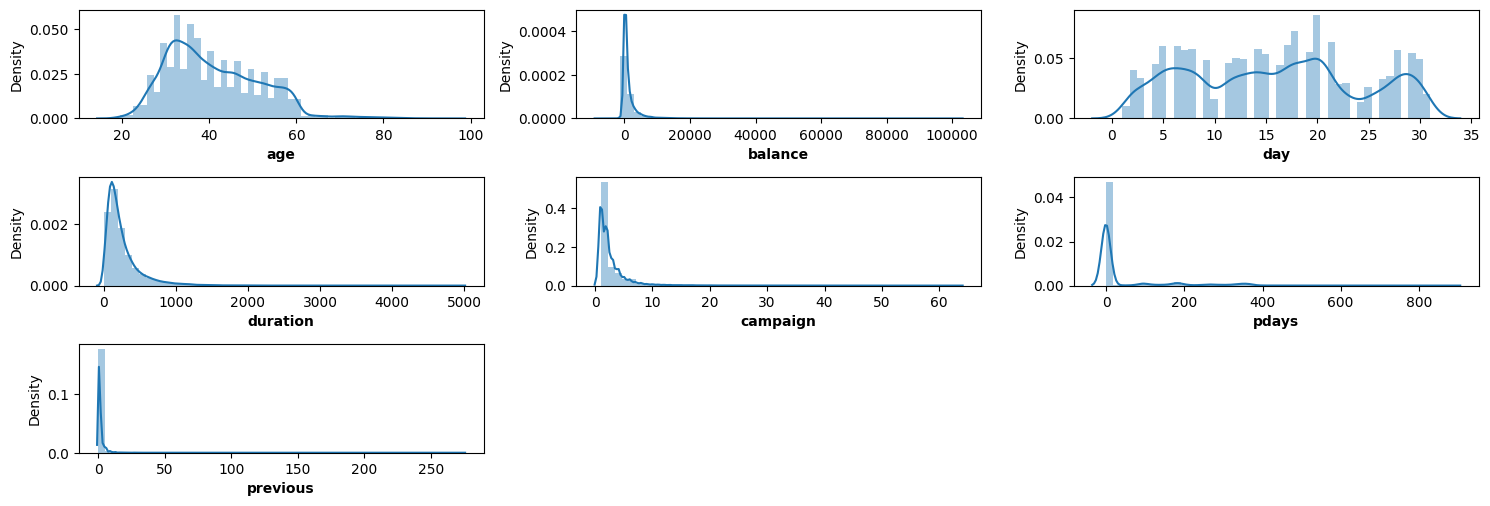

In [15]:
numeric_features = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=train_df[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

## Observations:

* Most of the data points are right skewed data, not showing any signs of normal distribution.

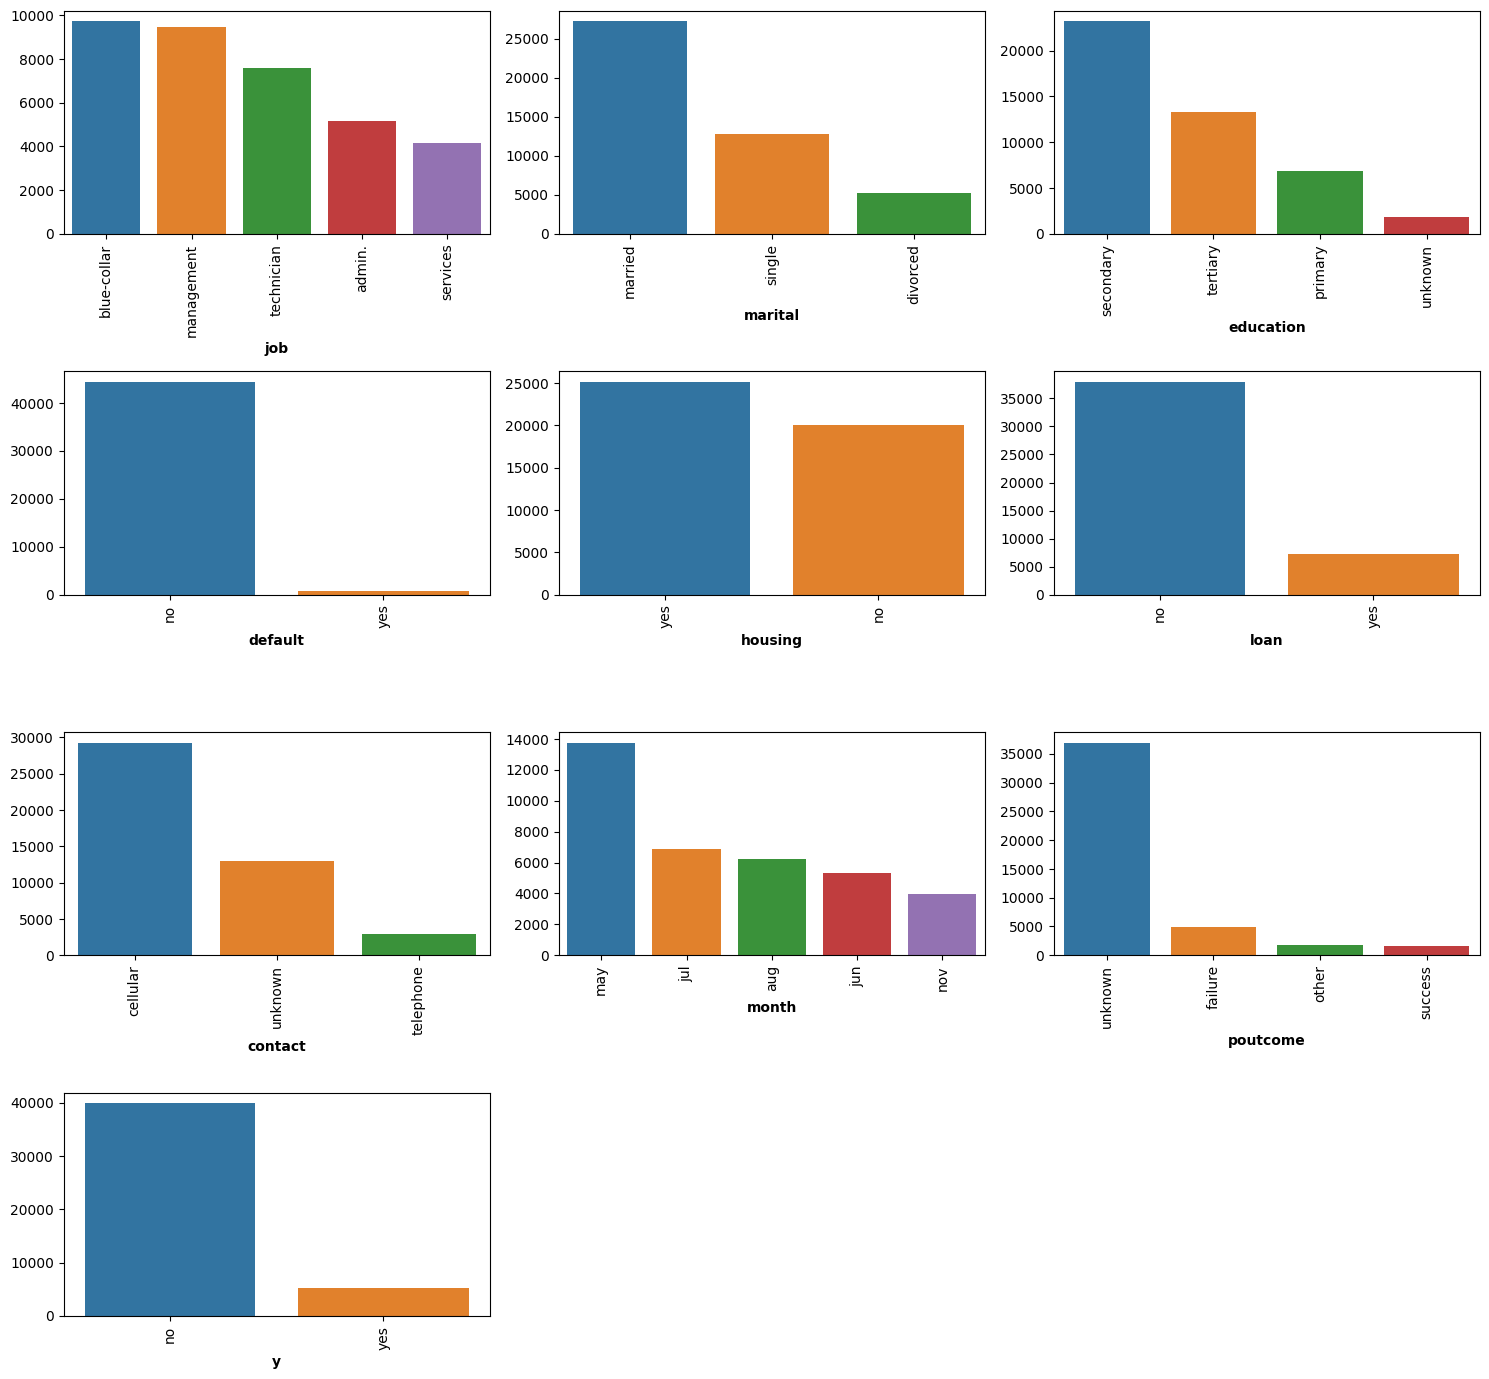

In [16]:
# Find categorical columns with too many unique values
cat_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

plt.figure(figsize=(15, 35))
for i, col in enumerate(cat_features):
    plt.subplot(len(cat_features), 3, i+1)
    # Get the top N most frequent categories
    top_categories = train_df[col].value_counts().head()
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.xlabel(col, weight='bold')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()

## Observations:

* Most of customers do blue-collar `jobs` in our study, followed by management, technician, admin & services
* Most of the customers are married, followed by single and divorced
* Most of the customer have obtain `education` level of secondary, followed by tertiary, primary and unknown category
* Most of the customers have not defaulted
* We can see a balanced report on `housing` column
* Most of the customers do not have `loan` with the bank
* The team are contacting the customers mostly by telephone, however we have celluar category here, which we can replace to telephone only
* We have data from may till nov `month`
* `outcome` also has unknown and other category which can be replaced by unknown, followed by success and failure
* In the target column `y` we can see an imbalance which we need to handle using sampling techniques. 


In [17]:
## Replacing the columns

train_df['contact'] = train_df['contact'].replace('cellular', 'telephone')
train_df['poutcome'] = train_df['poutcome'].replace('unknown', 'other')

<Axes: xlabel='contact', ylabel='count'>

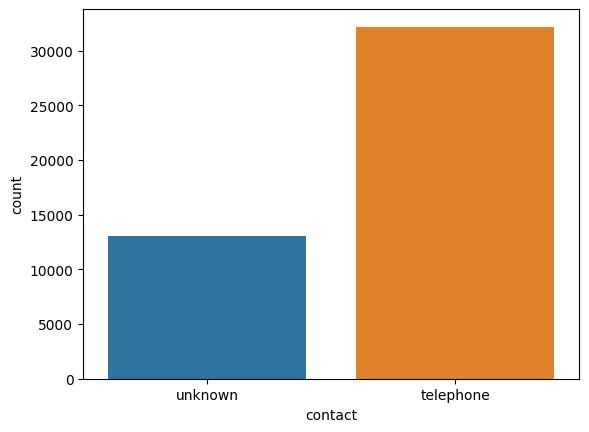

In [18]:
## Checking the visualizations

sns.countplot(data=train_df, x='contact')

<Axes: xlabel='poutcome', ylabel='count'>

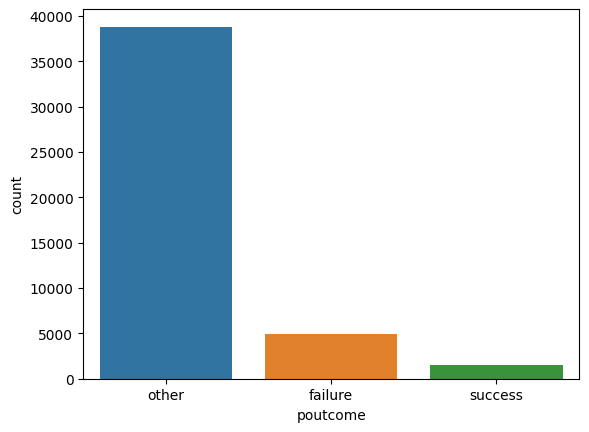

In [19]:
sns.countplot(data=train_df, x='poutcome')

## Encoding the features

In [20]:
df = train_df.copy(deep=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no


In [23]:
## Define the pipeline

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder()),
    ]
)

In [24]:
X = df.drop(columns=['y'], axis=1)

y = df["y"]

In [25]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other


In [26]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [27]:
## Mannually encoding the target variable

y = y.replace({'no': 0,
               'yes': 1})

In [28]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [29]:
## Define numerical and categorical features

## numerical features

numeric_features = X.select_dtypes(exclude="object").columns


## Categorical features

categorical_features = X.select_dtypes(include="object").columns

print(numeric_features)
print(categorical_features)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [30]:
## Scale the features

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
    ("RobustScaler", RobustScaler(), numeric_features)
], remainder="passthrough")

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
## Transform the datasets

X_train = transformer.fit_transform(X_train)

X_test = transformer.transform(X_test)

In [33]:
X_train.shape, X_test.shape

((36168, 16), (9043, 16))

## Handling the data imbalance

In [34]:
from imblearn.over_sampling import RandomOverSampler 

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [35]:
y_train.value_counts()

y
0    31970
1    31970
Name: count, dtype: int64

## Baseline Modelling

In [36]:
def evaluate_model(true, predicted):
    score_f1 = f1_score(true, predicted, average="weighted")
    accuracy = accuracy_score(true, predicted)

    return score_f1, accuracy

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using XGBoost, RandomForest, and ExtraTrees classifiers.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for XGBoost, RandomForest, and ExtraTrees classifiers.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1}

    return results

In [38]:
results = fit_classification_models(X_train, y_train)

In [39]:
# Create a DataFrame from the results
df = pd.DataFrame(results).transpose()

# Sort the DataFrame by the F1-score in descending order
df_sorted = df.sort_values(by='f1-score', ascending=False)

# Display the sorted DataFrame
df_sorted

,accuracy,f1-score
ExtraTreesClassifier,0.983578,0.983573
Random Forest,0.969033,0.969000
XGBoost,0.932515,0.932370


In [40]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.model_selection import GridSearchCV, KFold

In [41]:
def model_performance(model, y_test, y_hat) :
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))


    #plots
    model = model

    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False,
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)

    fig['layout'].update(showlegend = False, title = 'Model performance report'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14

    py.iplot(fig)

In [42]:
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)
y_pred = extratree.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
model_performance(extratree,y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [45]:
top_feat_importances = print(extratree.feature_importances_)

[0.05088041 0.02550058 0.03187236 0.00362217 0.03529365 0.01476677
 0.05479269 0.09029798 0.05796755 0.07711052 0.06378361 0.07951217
 0.31190827 0.05112775 0.03196986 0.01959366]


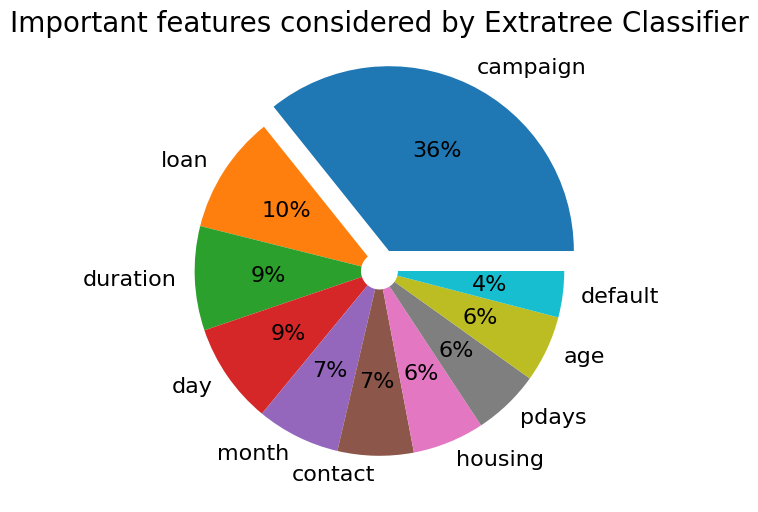

In [46]:
feat_importances = pd.Series(extratree.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extratree Classifier',fontsize=20)
plt.show()

## Hyperparameter tuning using optuna
[optuna docs](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html)

In [47]:
from sklearn.model_selection import cross_val_score
import optuna

In [48]:
def objective(trial):

    ### define params grid to search maximum accuracy
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth', 10, 16)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 15, 25)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    ### modeling with suggested params
    model = ExtraTreesClassifier(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_leaf_nodes = max_leaf_nodes,
                                 criterion = criterion,
                                 random_state = 0) # do not tune the seed

    ### cross validation score
    # score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    # etr_score = score.mean()

    ### fit
    model.fit(X_train, y_train) # train on train data
    accuracy = round(model.score(X_test, y_test), 5) # validate on validation data

    return accuracy
    
study = optuna.create_study(direction='maximize') # maximize accuracy
study.optimize(objective, n_trials=20)

[I 2024-03-04 15:38:42,837] A new study created in memory with name: no-name-969f5e46-6035-433f-9aae-4fc43b9fc6ca
[I 2024-03-04 15:38:45,570] Trial 0 finished with value: 0.75694 and parameters: {'n_estimators': 82, 'max_depth': 10, 'max_leaf_nodes': 17, 'criterion': 'entropy'}. Best is trial 0 with value: 0.75694.
[I 2024-03-04 15:38:48,018] Trial 1 finished with value: 0.77143 and parameters: {'n_estimators': 67, 'max_depth': 12, 'max_leaf_nodes': 25, 'criterion': 'gini'}. Best is trial 1 with value: 0.77143.
[I 2024-03-04 15:38:51,181] Trial 2 finished with value: 0.77563 and parameters: {'n_estimators': 89, 'max_depth': 13, 'max_leaf_nodes': 22, 'criterion': 'entropy'}. Best is trial 2 with value: 0.77563.
[I 2024-03-04 15:38:54,827] Trial 3 finished with value: 0.77043 and parameters: {'n_estimators': 107, 'max_depth': 14, 'max_leaf_nodes': 18, 'criterion': 'gini'}. Best is trial 2 with value: 0.77563.
[I 2024-03-04 15:38:56,868] Trial 4 finished with value: 0.75362 and parameters

In [49]:
# best params
study.best_trial.params

{'n_estimators': 77,
 'max_depth': 15,
 'max_leaf_nodes': 25,
 'criterion': 'entropy'}

In [50]:
# best score (accuracy)
study.best_value

0.77773

In [51]:
# param importances dictionary
optuna.importance.get_param_importances(study)

{'max_leaf_nodes': 0.3709874442501103,
 'n_estimators': 0.3316733007410828,
 'max_depth': 0.2821578297328012,
 'criterion': 0.01518142527600563}

In [52]:
### plot param importances
optuna.visualization.plot_param_importances(study)

In [53]:
# plot optimization history
optuna.visualization.plot_optimization_history(study)

In [54]:
# plot parallel coordinate
optuna.visualization.plot_parallel_coordinate(study)

In [55]:
# slice plot
optuna.visualization.plot_slice(study)

## Save the model

In [56]:
import joblib
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
model = ExtraTreesClassifier(
    n_estimators = 103,
     max_depth = 11,
     max_leaf_nodes = 25,
     criterion = 'entropy')

model.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=25,
                     n_estimators=103)

In [58]:
# Save the trained model 

joblib.dump(model, 'td_model.pkl')

['td_model.pkl']